<a href="https://colab.research.google.com/github/pikey-msc/AprendizMaquina/blob/main/2023-1/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de información GITHUB

In [1]:
try:
    !rm -rf AprendizMaquina
except:
    print("No existe la ruta aún")



!git clone 'https://github.com/pikey-msc/AprendizMaquina'


Cloning into 'AprendizMaquina'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 195 (delta 26), reused 0 (delta 0), pack-reused 66
Receiving objects: 100% (195/195), 11.05 MiB | 15.01 MiB/s, done.
Resolving deltas: 100% (43/43), done.


#Carga de librerías

In [2]:
#Cargar módulo de R en Python
# A bit of imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [14]:
%%R
#install.packages("dplyr")
# library(dplyr) # "Libreria utilizada para manejar datos"
# library(rpart)
# install.packages("rpart.plot")
# library(rpart.plot)
install.packages("caret")
library(caret)
# install.packages("e1071")
# library(e1071)
install.packages("ModelMetrics")
library(ModelMetrics)
# install.packages("party")
# library(party)
# install.packages("boot")
# library(boot)
# install.packages("ipred")
# library(ipred)
# install.packages("randomForest")
# library(randomForest)
# library(ggplot2)
# install.packages("ISLR")
# library(ISLR)
install.packages("kknn")
library(kknn)




(as ‘lib’ is unspecified)























































































































	‘/tmp/Rtmps1IUWe/downloaded_packages’



Attaching package: ‘caret’



    confusionMatrix, precision, recall, sensitivity, specificity



    contr.dummy


(as ‘lib’ is unspecified)







	‘/tmp/Rtmps1IUWe/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmps1IUWe/downloaded_packages’



# Introducción

El algoritmo K-vecinos más cercanos, abreviado como KNN por sus siglas en inglés (K - Nearest Neighbor) es de tipo supervisado. Se utiliza  para problemas de clasificación como de regresión, aunque principalmente se utiliza para el primero.

El algoritmo KNN es uno de los  más simples, almacena todos los datos disponibles y clasifica un nuevo punto de datos en función de la similitud. Esto significa que cuando aparecen nuevos datos, se pueden clasificar fácilmente en una categoría dentro del conjuntos de categorías  utilizando el algoritmo.Es un algoritmo no paramétrico, lo que significa que no hace ninguna suposición sobre los datos subyacentes.

*El algoritmo KNN de conoce como perezoso porque no aprende del conjunto de entrenamiento inmediatamente, sino que almacena el conjunto de datos y, en el momento de la clasificación, realiza una acción en el conjunto de datos.

En la fase de entrenamiento solo almacena el conjunto de datos y cuando obtiene nuevos datos, los clasifica en una categoría que es muy similar a los nuevos datos.*


Supongamos que deseamos clasificar la imagen de una criatura, queremos saber si es un gato o un perro. Para esto, podemos usar el algoritmo KNN, ya que funciona en una medida de similitud. Nuestro modelo KNN encontrará las características similares del nuevo conjunto de datos a las imágenes de perros y gatos y, en función de las características más similares, las colocará en la categoría de perros o gatos.

#Algoritmo

## Clasificación

Para implementar el algoritmo KNN en clasificación, se siguen una serie de pasos. Supongamos que queremos clasificar un nuevo punto, digamos $x$. Sea $X$ el conjunto de datos almacenados, es decir, aquellos que ya están clasificados y $m$ la cardinalidad de $X$. \\

Sea $n \in \mathbb{N}^{+},n \leq m$ y  $\mathcal{C} = \{c_1,...,c_n\}$ el conjunto de categorías, es decir, tenemos $n$ categorías diferentes, donde para $j \in \{1,..,n\}$, $c_j \subseteq X$   y para toda $i,j \in \{1,...,n\}, i \neq j$, $c_j \cap c_j =  \varnothing$ y $\bigcup_{i=1 }^{n} c_i = X$. Esto es, que los puntos en $X$ se encuentran todos clasificados, además, que las categorías son excluyentes (un punto no puede pertenecer a más de una categoría). De esta manera, queremos averiguar a cual categoría pertenece el nuevo punto $x$.

1. Se selecciona el valor $k \in \mathbb{N} , k \leq m$ del número de vecinos para $x$ 
2. Se calcula la distancia euclidiana de $x$ a todos los datos que se encuentran en $X$.
3. Nos quedamos con los K vecinos más cercanos a $x$ según la distancia euclidiana calculada. Supongamos que son el conjunto $\mathcal{K}=\{x_1,...,x_k\}$
4. Entre estos k vecinos, contamos el número de puntos de datos en cada categoría. De esta manera, definamos $C :\mathcal{C} \to \mathbb{N}$ tal que para $x_j \in \mathcal{C}$, $$C(c_j) = t $$  donde $j \in \{1,...,n\}$ y $t$ es igual al número de datos $t$ que pertenecen a la categoría $c_j$ en el conjunto $\mathcal{K}$.
5. Se calcula $$\max_{i \in \{1,...,n\}} C(c_i) $$  Es decir, en el conjunto $\mathcal{K}$ vemos cuál categoría predomina. 
6. Después, se dice que $x \in c_j$ con $j \in \{1,...,n\}$ si   $\max_{i \in \{1,...,n\}} C(c_i) = C(c_j) $. 

Es decir, que clasificamos al nuevo punto $x$ en la categoría $c_j$ si la cantidad de elementos pertenecientes a la categoría $j$ en el conjunto $\mathcal{K}$ es la más grande respecto a la cantidad que hay de elementos de las otras categorías

## **Ejemplo de KNN con Python (Sci-Kit)**

Se usará el conjunto de datos **IRIS** que ya se ha utilizado varias veces.

Además, se usarán librerías ***Scikit-Learn*** ó ***Seaborn**.


> ### **Iris Dataset**

* Las especies de iris estudiadas son **setosa**, **versicolor** and **virginica** comparten un conlor similar, violeta oscuro o azul oscuro.
* Para distinguir las especies se hace a través de sus pétalos y sépalos.

> **Se imports la librería _Seaborn_ y luego se carga el conjunto iris.**

En comparación con Scikit-Learn que carga el mismo conjunto de datos como arreglo, Seaborn lo carga como objeto de Pandas.


In [36]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [37]:
type(iris)

pandas.core.frame.DataFrame

Se usa el método **sample** de Pandas para obtener una muestra aleatoria y poder visualizarlo

In [38]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
43,5.0,3.5,1.6,0.6,setosa
144,6.7,3.3,5.7,2.5,virginica
29,4.7,3.2,1.6,0.2,setosa
131,7.9,3.8,6.4,2.0,virginica


Hay 4 categories: "sepal length (cm)", "sepal width (cm)", "petal length (cm)" y "petal width (cm)".

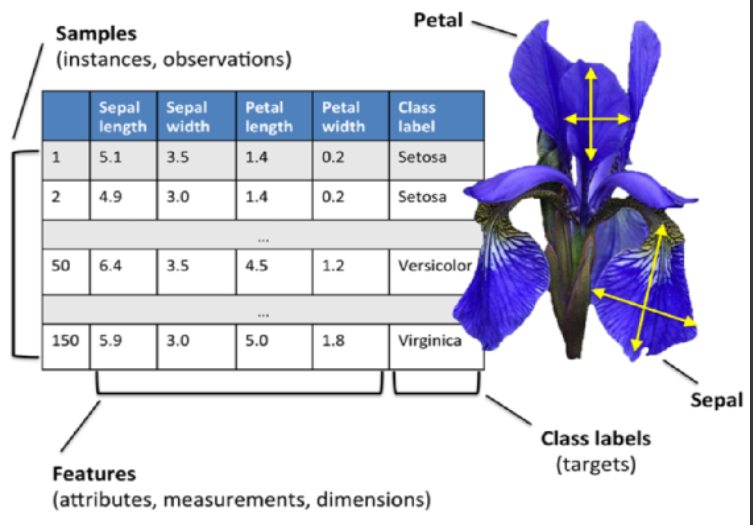

In [41]:
import pandas as pd

In [42]:
pd.value_counts(iris.species)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Trae 50 registros de cada especie.

> **Los estadísticos básicos en las columnas numéricas.**

A través de **describe** se muestran las principales medidas de centralidad, dispersión, max y min, y cuantiles.

In [43]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Al usar el método **info** da información extra del tipo de datos de cada columna

In [44]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Al usar **isnull** combinado con **sum** muestra cuántos nullos hay por columna.

In [45]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

> ### **Análisis exploratorio visual**

Se usa **Seaborn** que se basa en **Matplotlib** para gráficas estadísticas.


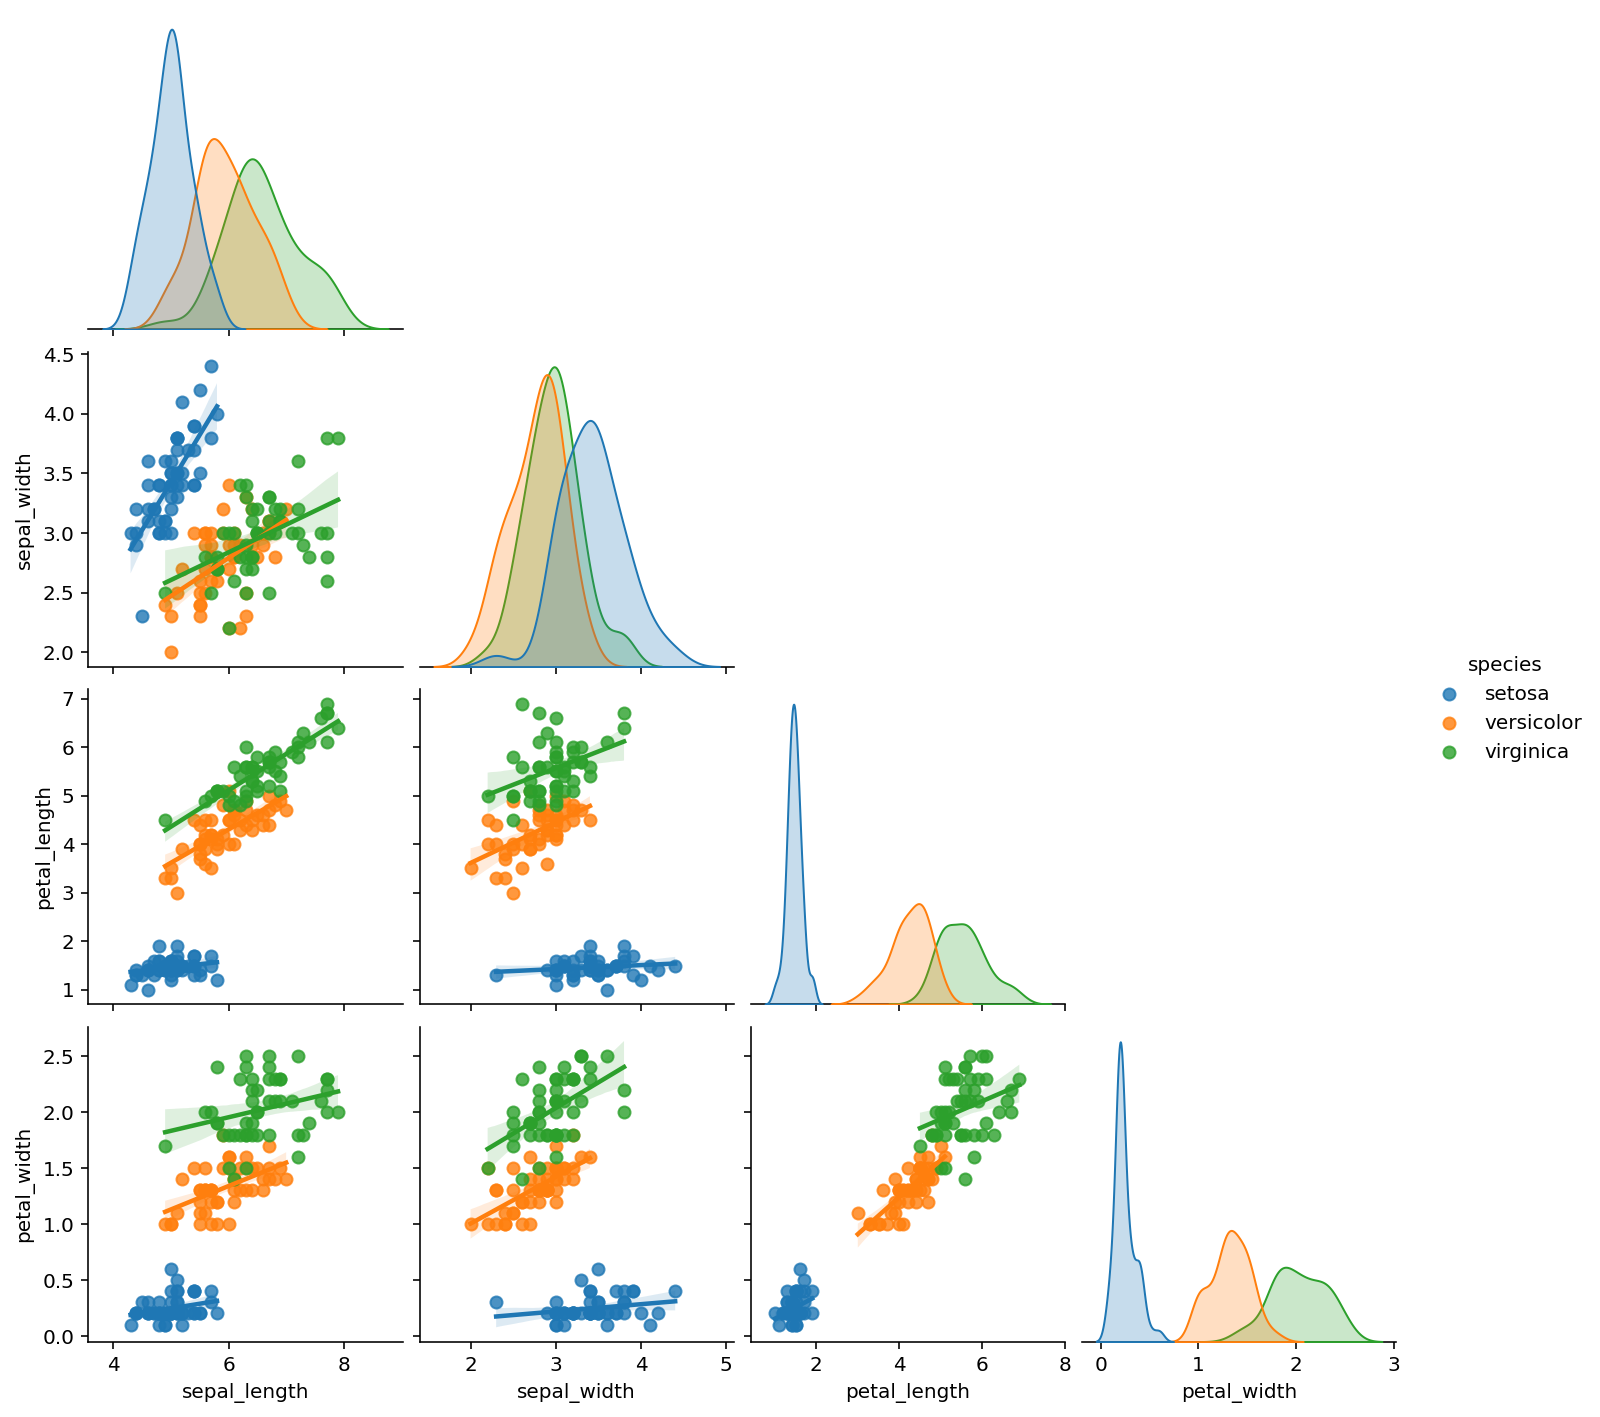

In [46]:
sns.pairplot(iris, hue="species", corner=True, kind='reg')

> ### **Identificación de Setosa **

Como se observa en la gráfica, los datos de 
**iris-setosa** se distingue mucho de las otras especies. **Sólo hay que checar las dimensiones del pétalo**; si el largo del pétalo es mayor a 2 cm y si  el ancho es mayor a 0.7 cm es seguro que es iris-setosa.

In [50]:
print('La longitud máxima del pétalo de Setosa en la muestra es:', iris.loc[iris.species=='setosa'].max().petal_length, 'cm, para las otras especies el mínimo es', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_length, 'cm.\n El áncho del pétalo del máximo de setosa es', iris.loc[iris.species=='setosa'].max().petal_width, 'cm, y el mínimo para las otras especies es', iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')].min().petal_width, 'cm.')

La longitud máxima del pétalo de Setosa en la muestra es: 1.9 cm, para las otras especies el mínimo es 3.0 cm.
 El áncho del pétalo del máximo de setosa es 0.6 cm, y el mínimo para las otras especies es 1.0 cm.


In [51]:
from IPython.display import display
p_l = pd.pivot_table(iris, values=['petal_length'], index=['species'],aggfunc=[min,max], margins=False)
p_w = pd.pivot_table(iris, values=['petal_width'], index=['species'],aggfunc=[min,max], margins=False)
P_L = pd.DataFrame(p_l.to_records())
P_W = pd.DataFrame(p_w.to_records())
display(P_L),display(P_W)


,species,"('min', 'petal_length')","('max', 'petal_length')"
0,setosa,1.0,1.9
1,versicolor,3.0,5.1
2,virginica,4.5,6.9


,species,"('min', 'petal_width')","('max', 'petal_width')"
0,setosa,0.1,0.6
1,versicolor,1.0,1.8
2,virginica,1.4,2.5


(None, None)

> ### **Identificación de Virginica y Versicolor **

Visualmente la identificación entre estas dos especies es complicada, pero en las variables:

*   Sepal Length **vs** Sepal Width
Se puede observar cierta diferencia.

Por lo que se necesitará usar una algoritmo de clasificación

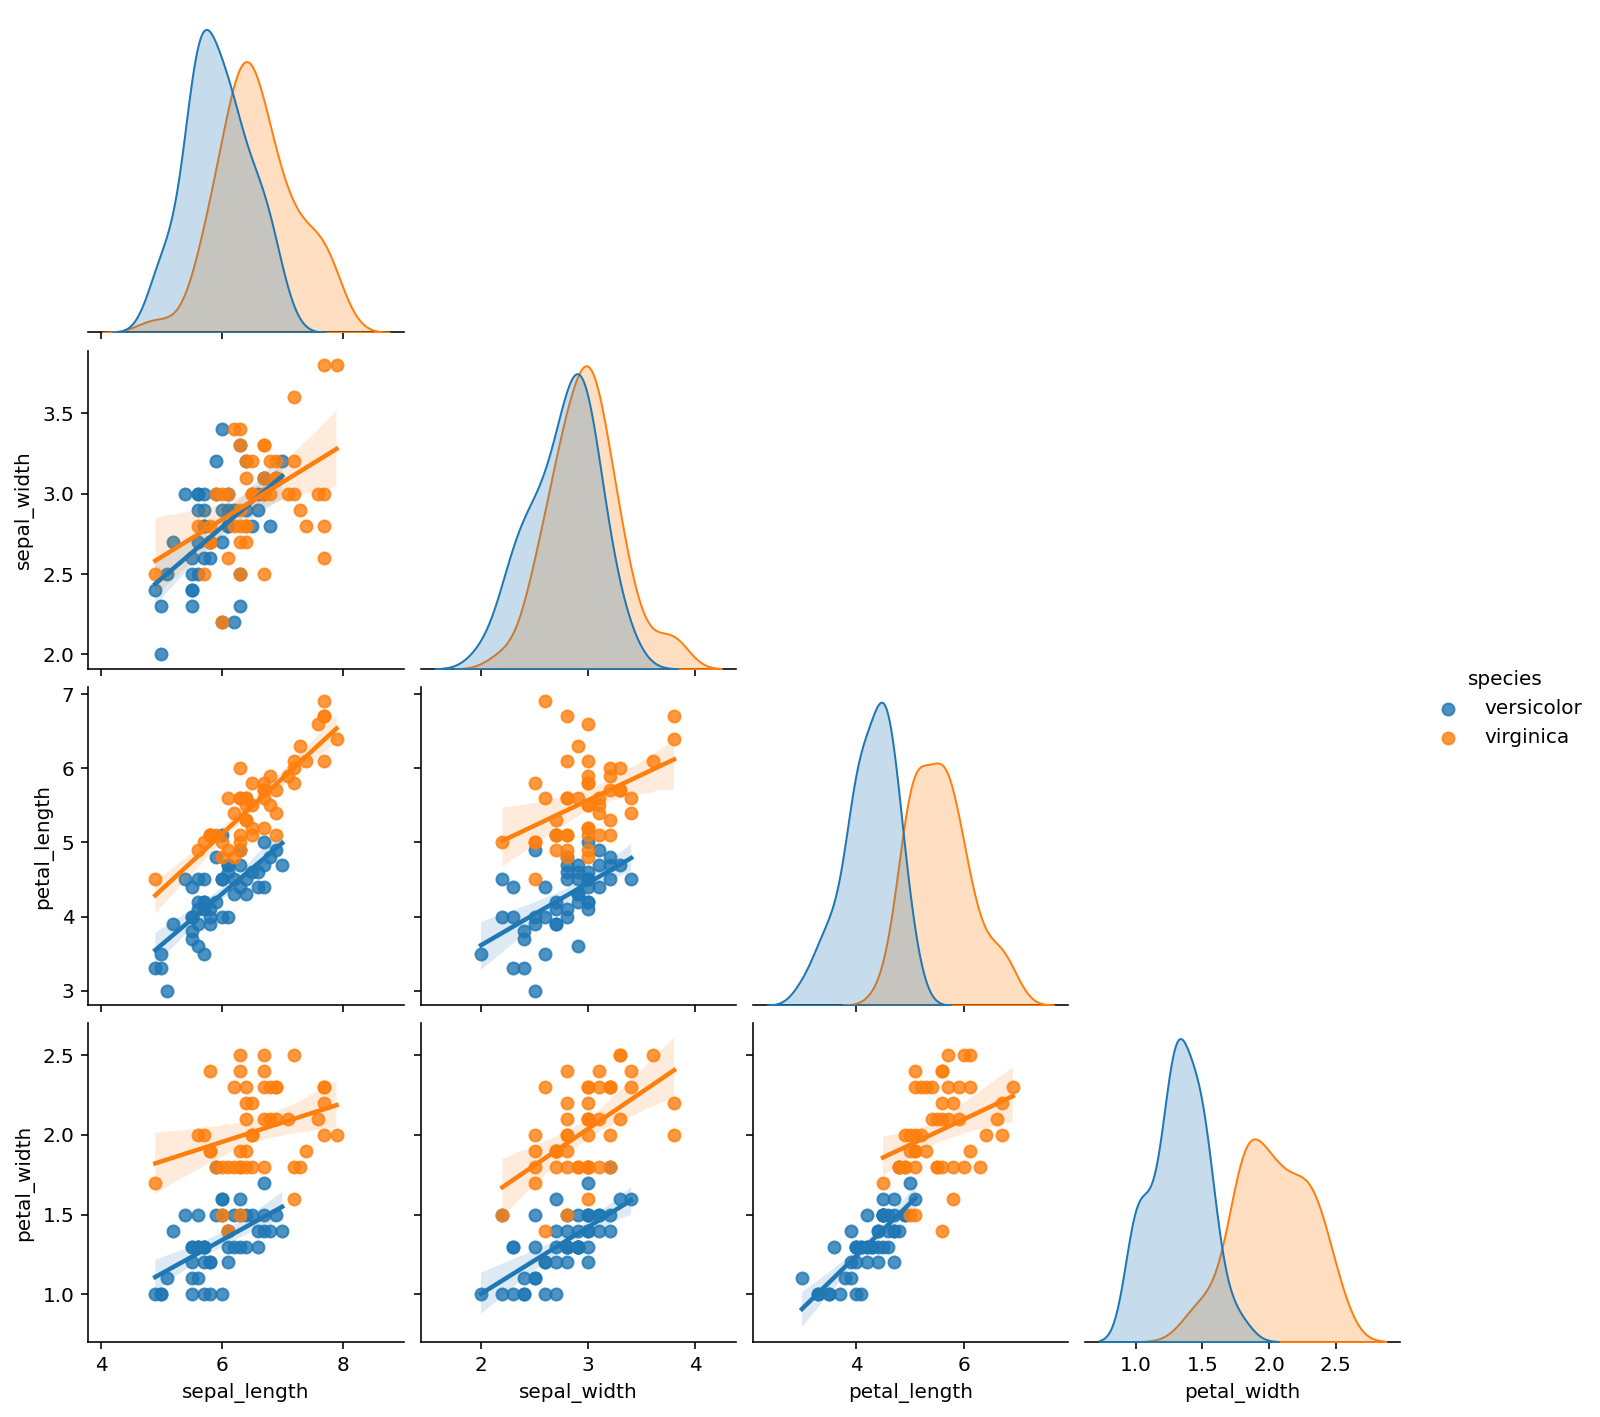

In [52]:
sns.pairplot(iris.loc[(iris.species=='virginica') | (iris.species=='versicolor')], hue="species", corner=True, kind='reg')

### **Análisis predictivo**

Se usará el algoritmo **KNN**.


> *Scikit-learn es una librería de aprendizaje de máquina de código abierto que provee algoritmos de aprendizaje supervisado y no supervisado, así como herramientas para ajuste de modelos, preprocesamiento de datos, selección y evaluación de modelos, y otras utilidades.*

> ### **Datos TRAIN y TEST**



> Se usará **70% como train** y **30% como test**.  

Se debe asegurar no utilizar ningún dato sesgado

> ***Scikit-learn*** tiene la función, **train_test_split**; sin embargo, cada que se ejecuta siempre trae distintus resultados, lo que sería imposible de replicar.**

> ***Panda*** puede solucionar este tema con la función **random_state=500** puede hacer replicable el tema por cualquier persona.



In [62]:
train = iris.sample(frac=0.7, random_state=500) # random state is a seed value

In [63]:
test = iris.drop(train.index)

In [64]:
X_train = train.drop(labels='species', axis=1)

In [65]:
y_train = train.species

In [66]:
X_test = test.drop(labels='species', axis=1)

In [67]:
y_test = test.species

> si no se reqiere replicar

> se usa el siguiente código:
````
from sklearn.model_selection import train_test_split
X_train,  X_test,  y_train,  y_test = train_test_split ( iris.drop ( 'species' ,axis = 1 ) , iris [ 'species' ] , test_size = 0.3, random_state = 1 )
````

> Se muestran 5 valores que se obtuvieron para ver que no cambian.

* Cada que se usa el método *train_test_split*  is run se obtiene una *muestra diferente * para test y train. Esto hace, en cada ejecución los resultados cambian. 
Para minimizar esto se usa la técnica en training/testin con distintas partes del conjunto de datos que se llama **cross validation**.

In [69]:
print(X_train.head(),"\n", y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
7             5.0          3.4           1.5          0.2
126           6.2          2.8           4.8          1.8
136           6.3          3.4           5.6          2.4
133           6.3          2.8           5.1          1.5
66            5.6          3.0           4.5          1.5 
 7          setosa
126     virginica
136     virginica
133     virginica
66     versicolor
Name: species, dtype: object


Se muestran las dimensiones de los conjuntos:

In [60]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [61]:
y_train.shape,y_test.shape

((105,), (45,))

### **KNN - K Nearest Neighbors***

Para reconocimiento de patrones el algoritmo de los vecinos más cercanos *k-nearest neighbors* (k-NN) es un método no paramétrico usado para clasificación y regresión. 



> ### **Uso del algoritmo KNN**

La función **KNeighborsClassifier** tiene varios parámetros para mejorar el desempeño del algoritmo. Por el momento sólo se usará *n_neighbors* lo demás se dejará por defecto.


In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)

n_neighbors se dejará como 3.

> ### **Entrenando el algoritmo KNN**
Se usa el método 
**Fit** para hacer el ajuste en el conjunto de entrenamiento.

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Antes de predecir los resultados se puede estimar la precisión sobre el el conjunto de prueba.

In [74]:
knn.score(X_test,y_test)

0.9555555555555556

> ### **Predecir valores con el algoritmo KNN**

Se usa el método
**Predict** para predecir con base en el modelo ajustado.

In [75]:
results = knn.predict(X_test)

>### **Validation**

Técnicas para calcular y mejorar el desempeño del modelo. 

> ### **Tabulation Cruzada o Matriz de confusión**

El método **Cross Tabulation** se usa para ver la matriz de reales y predecidos

In [ ]:
print(pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total'))

Predicted   setosa  versicolor  virginica  total
Real                                            
setosa          12           0          0     12
versicolor       0          20          2     22
virginica        0           0         11     11
total           12          20         13     45



* Virginica se predice todas correctamente con **recall** de 100%.

Las otras dos especies no tienen esa suerte.

> #### **Métricas de clasificación**

Con **Metrics**, la **precision** calculada y el **recall** de cada especie se muestra de forma tabular.

El **f1-score** representa un promedio ponderado entre estas dos métricas. Es una gran métrica para no tomar en cuenta los verdaderos negativos que generalmente son irrelevantes.

La precisión muestra la fidelidad del algoritmo sobre todas las clasificaciones.

In [76]:
from sklearn import metrics

In [77]:
print(metrics.classification_report(y_test,results,target_names=iris.species.unique(), digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        12
  versicolor      1.000     0.909     0.952        22
   virginica      0.846     1.000     0.917        11

    accuracy                          0.956        45
   macro avg      0.949     0.970     0.956        45
weighted avg      0.962     0.956     0.956        45



La precisión es con el f1-score es 95.6%.

> ### **Validación Cruzada**



Se usará el método de **Cross Validation**, que segmenta el conjunto de entrenamiento en **n** conjuntos (para este caso n = 5), y ajusta y predice  para cada conjunto.

Optimiza las métricas de clasificación, reduciendo el riesgo de sobredispersión.


In [78]:
from sklearn.model_selection import cross_val_score

Se sabe que usando random_state=500 el desempeño fue de 95.6%.

In [81]:
scores = cross_val_score(knn, iris.drop('species',axis=1), iris.species, cv=5, scoring='accuracy')
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

Con la validación cruzada la precisión va de 93% a 100%.



>### **Optimizando los parámetros K (n_neighbors)**

> #### **Definiendo lista de parámetros K**
Con **GridSearch Object** se optimizan los parámetrosd.



Se usaron inicialmente K=3 

Si iterará de 1 a 30.

In [83]:
k_list = list(range(1,31))

In [84]:
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


> ### **Usando el objeto GridSearch**

Itera los hiperparámetros para encontrar el mejor clasificador

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

> ### **Entrenando el objeto GridSearch Object**

In [87]:
grid.fit(iris.drop('species', axis=1), iris.species)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

> ### **Revisando los Scores**



In [88]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002395,0.001369,0.002558,0.000389,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,19
1,0.001651,0.000065,0.002309,0.000138,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,26
2,0.001685,0.000079,0.002384,0.000127,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.002184,0.000781,0.003046,0.000666,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.001958,0.000467,0.002406,0.000129,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6


La lista de cv_results_method muestra estas métricas

In [89]:
for key in grid.cv_results_.keys():
  print(key) 

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [90]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
5,{'n_neighbors': 6},0.98,0.016330,1
6,{'n_neighbors': 7},0.98,0.016330,1
9,{'n_neighbors': 10},0.98,0.026667,1
10,{'n_neighbors': 11},0.98,0.026667,1
11,{'n_neighbors': 12},0.98,0.026667,1


> La mejor precisión con el menor $k$ es:

In [91]:
print("El mejor valor de k = {} con {} de precisión.".format(grid.best_params_,grid.best_score_))

El mejor valor de k = {'n_neighbors': 6} con 0.9800000000000001 de precisión.


> También tiene la menor dispersión con rango  1.

> The rango sólo depende de la precisión

In [92]:
print("el mejor valor k, con rango {}, con k = {}, tien la mayor precisión con la validación cruzada = {} y la menor desviación estándar = {}".format(grid_table.at[grid.best_index_,'rank_test_score'],grid_table.at[grid.best_index_,'params'],grid_table.at[grid.best_index_,'mean_test_score'],grid_table.at[grid.best_index_,'std_test_score']))

el mejor valor k, con rango 1, con k = {'n_neighbors': 6}, tien la mayor precisión con la validación cruzada = 0.9800000000000001 y la menor desviación estándar = 0.016329931618554516


> Entonces el mejor clasificador es:

In [93]:
print("El mejor clasificador es is: {}".format(grid.best_estimator_))

El mejor clasificador es is: KNeighborsClassifier(n_neighbors=6)


> #### **Gráficas**

La lista de resultados de el número k de vecinos vs la precisión


In [ ]:
import matplotlib.pyplot as plt

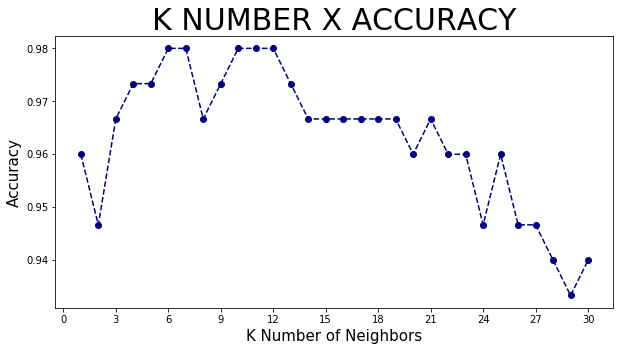

In [ ]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K Número X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

### **Conclusiones**

Se sugiere siempre usar el **GridSearch Object**. 

## Ejemplo 1 en R

[1] 30


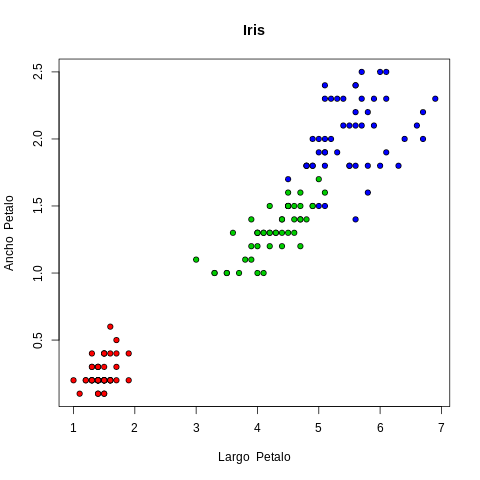

In [ ]:
%%R
#--------------Algoritmo kNN   Vecinos más cercanos----------------------

#  El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor).
#  Se midió cuatro rasgos de cada muestra: lo largo y lo ancho del sépalos y pétalos, en centímetros.
#  Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra
#  Pasos:
#    
#    Paso 1: Obtener una muestra de 6 elemenos con datos setosa y versicolor
#  
#  Paso 2: Utilizar un punto k=1 definido en X
#  
#  Paso 3: Calcular las distacias euclideanas entre los puntos y k
#  
#  Paso 4: Clasificar la información de acuerdo a las distancias de mayor a menor y dividir la información en k=1  
#  ALGORITMO kNN
#  Escoger el número de vecinos cercanos, es decir, determinar el valor de k, representa un valor muy significativo para determinar la eficiencia del modelo. Por tanto, la selección de k determinará que tan bien los datos pueden ser utilizados para generalizar los algoritmos del modelo KNN
#  Si k es muy pequeño el modelo será muy sentitivo a puntos que son atípicos o que son ruido (datos corruptos).
#  Si k es muy grande, el modelo tiende a asignar siempre a la clase más grande.
#  Sin embargo, en R es posible obtener el valor de k óptimo
#  ALGORITMO kNN
#  La base "Iris" puededescargarse mediante R.   

Iris  <-iris  #  Guardamos  los  datos
#  summary(Iris)
#  Cambiamos  el  nombre  de  las  columnas  por:

colnames(Iris)  <- c("Largo_Sepalo","Ancho_Sepalo","Largo_Petalo","Ancho_Petalo",  "Especies")

#  Visualización de Iris
plot(Iris$Largo_Petalo,  Iris$Ancho_Petalo,  pch=21,bg=c("red","green3","blue")[unclass(Iris$Especies)],  main="Iris",xlab  =  "Largo  Petalo",ylab  ="Ancho  Petalo")

#ALGORITMO kNN
# Iris: Prueba / Test

# Dividir los datos en:
#   ** Datos de prueba: Datos historicos para ajustar el modelo

#  ** Datos de test: Datos históricos para evaluar (probar) el modelo

#  Barajeamos la información de iris

#  Fijamos  la  semilla  aleatoria  de  los  datos

set.seed(42)

#  Barajeamos  de  manera  aleatoria  los  indices  de  los  renglones

renglones  <-sample(nrow(Iris))

#  De  forma  aleatoria  reordenamos  los  datos

Iris  <-Iris[renglones,  ]


#División datos: prueba/test

#Opción 1: División por porcentaje 80% - 20%
#  Paso  1.  Fijamos  la  variable  de  división  de  80%  en  los  datos

division  <- round(nrow(Iris)  *  .80)
#Paso  2.  Tomamos  el  80%  de  los  datos  como:  Datos  prueba

prueba  <- Iris[1:division,]

nrow(prueba)

#Paso  3.  Tomamos  el  20%  de  los  datos  como:  Datos  test
test  <-Iris[(division  +  1):nrow(Iris),  ]

nrow(test)



#División datos: prueba/test

#Opción 2: División por número de elementos 120 - 30
#  Paso  1.  Fijamos  las  variables  de  división  de  120  datos

division  <-sample(1:150,120)
#Paso  2.  Tomamos  120  datos  como:  Datos  prueba

prueba  <-Iris[division,]

nrow(prueba)

#Paso  3.  Tomamos  30    datos  como:  Datos  test

test  <-Iris[-division,]

nrow(test)

#Calculo del modelo kNN en R
# install.packages("kknn")


In [ ]:
%%R
library(kknn)          #  Para  poder  utilizar  el  Modelo  kNN  ponderado
library(class)        #  Opcional  para  poder  utilizar  kNN

#  Ajuste  del  modelo  "kNN""

modelo=train.kknn(prueba$Especies~.,data=prueba,K=8)
modelo$best.parameters
#  Para  este  ejercicio  utilizaremos  K  =  8

#  Predicción  de  los  datos

p  <-predict(modelo,test[,-5])

p  


#Calcular la Matriz de Confusión

# Crea  la  matriz  de  confusión 

#Crea  la  matriz  de  confusión
confusionMatrix(p,test[["Especies"]])
table(p,  test[["Especies"]])




            
p            setosa versicolor virginica
  setosa          8          0         0
  versicolor      0         13         0
  virginica       0          1         8


k-Nearest Neighbors 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 108, 108, 108, 107, 107, 109, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.9556527  0.9326539
   7  0.9584305  0.9369979
   9  0.9475330  0.9206631
  11  0.9580031  0.9371873
  13  0.9665113  0.9491378
  15  0.9665501  0.9493790
  17  0.9556527  0.9330442
  19  0.9472805  0.9203030
  21  0.9282329  0.8919107
  23  0.9256688  0.8880417
  25  0.9258825  0.8883393
  27  0.9364219  0.9043453
  29  0.9384810  0.9073795
  31  0.9391608  0.9084495
  33  0.9421911  0.9127483
  35  0.9363831  0.9038068
  37  0.9308275  0.8954735
  39  0.9336053  0.8996402
  41  0.9228910  0.8839078
  43  0.9196470  0.8791892

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 15.


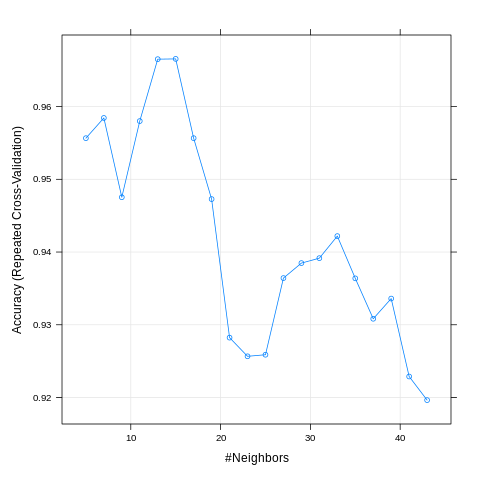

In [ ]:
%%R
#Calcular la "k"" óptima

#  Paso  1:  Definimos  control

ctrl  <-trainControl(method="repeatedcv",repeats  =  3)
#  Paso  2:  Calculamos  la  k  óptima
knnFit  <- train(Especies  ~  .,
                 data  =  prueba,
                 method  =  "knn",
                 trControl  =  ctrl,
                 tuneLength  =  20)
print(knnFit)



#Gráfica la "k" óptima

plot(knnFit)

## Ejemplo 2 en R

In [ ]:
%%R
#Ejercicio 113: Billetes Banco

#Los datos son extraídos de imagenes que fueron tomadas de billetes de banco genuinos y falsificados.

#  Para la digitalización, se utilizó una camara industrial usualmente utilizada para inspección de impresión.

# Las imagenes tienen 400 X 400 pixeles con una resolución de 660 dpi.

#  Se utilizo una transformación de imagenes para almacenar la información en una base de datos.

# ALGORITMO kNN
#  Resumen

billete <- read.table("/content/AprendizMaquina/2023-1/KNN/Datos/data_banknote_authentication.txt", header  =  F,  sep =  ",")

colnames(billete) = c('variance_wavelet_transformed_image', 'skewness_wavelet_transformed_image', 'curtosis_wavelet_transformed_image', 'entropy_image', 'clase')

print(head(billete))
print(summary(billete))


  variance_wavelet_transformed_image skewness_wavelet_transformed_image
1                            3.62160                             8.6661
2                            4.54590                             8.1674
3                            3.86600                            -2.6383
4                            3.45660                             9.5228
5                            0.32924                            -4.4552
6                            4.36840                             9.6718
  curtosis_wavelet_transformed_image entropy_image clase
1                            -2.8073      -0.44699     0
2                            -2.4586      -1.46210     0
3                             1.9242       0.10645     0
4                            -4.0112      -3.59440     0
5                             4.5718      -0.98880     0
6                            -3.9606      -3.16250     0
 variance_wavelet_transformed_image skewness_wavelet_transformed_image
 Min.   :-7.0421          

In [ ]:
%%R


#  Fijamos  la  semilla  aleatoria  de  los  datos

set.seed(42)

#  Barajeamos  de  manera  aleatoria  los  indices  de  los  renglones

renglones  <-sample(nrow(billete))

#  De  forma  aleatoria  reordenamos  los  datos 

billete  <-billete[renglones,  ]


#  División por número de elementos 1000 -372

#  Paso  1.  Fijamos  las  variables  de  división  de  1000  datos 

division  <-sample(1:1372,1000)
#Paso  2.  Tomamos  1000  datos  como:  Datos  prueba

prueba  <-billete[division,]

print(nrow(prueba))

#Paso  3.  Tomamos  372  de  los  datos  como:  Datos  test

test  <-billete[-division,]

print(nrow(test)  )



[1] 1000
[1] 372


  0   1 
195 177 
Confusion Matrix and Statistics

   modelo
      0   1
  0 195   1
  1   0 176
                                          
               Accuracy : 0.9973          
                 95% CI : (0.9851, 0.9999)
    No Information Rate : 0.5242          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9946          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9944          
         Pos Pred Value : 0.9949          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5242          
         Detection Rate : 0.5242          
   Detection Prevalence : 0.5269          
      Balanced Accuracy : 0.9972          
                                          
       'Positive' Class : 0               
                                          


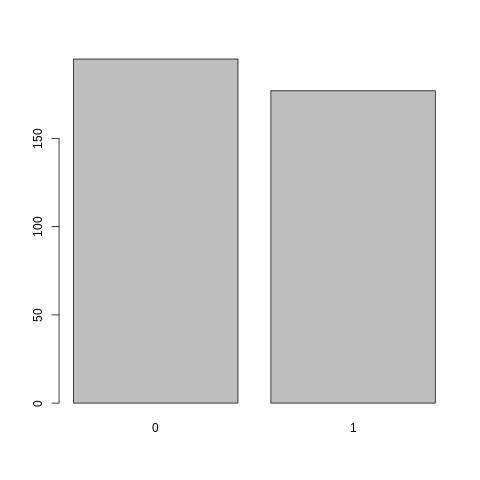

In [ ]:
%%R
#  Calculo del modelo kNN en R

#  Ajuste  del  modelo  "kNN""

modelo  <-knn(prueba[,1:4],test[,1:4],prueba[,5],k=3,prob=TRUE)
#Gráfica  del  modelo
print(summary(modelo))

plot(modelo)  


#  Predicción  de  los  datos
#Crea  la  matriz  de  confusión  
# print(confusionMatrix(table(prueba[,5],  modelo)))

confusionMatrix(table(test[,5],  modelo))



k-Nearest Neighbors 

1000 samples
   4 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 901, 900, 901, 899, 900, 900, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  1.0000000  1.0000000
   7  1.0000000  1.0000000
   9  1.0000000  1.0000000
  11  0.9990033  0.9979783
  13  0.9966632  0.9932313
  15  0.9946698  0.9891913
  17  0.9930063  0.9858129
  19  0.9930063  0.9858129
  21  0.9930063  0.9858129
  23  0.9930063  0.9858129
  25  0.9930063  0.9858129
  27  0.9930063  0.9858129
  29  0.9923397  0.9844667
  31  0.9923397  0.9844667
  33  0.9913463  0.9824599
  35  0.9906796  0.9811076
  37  0.9890096  0.9777274
  39  0.9900063  0.9797346
  41  0.9900063  0.9797346
  43  0.9893362  0.9783845

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.


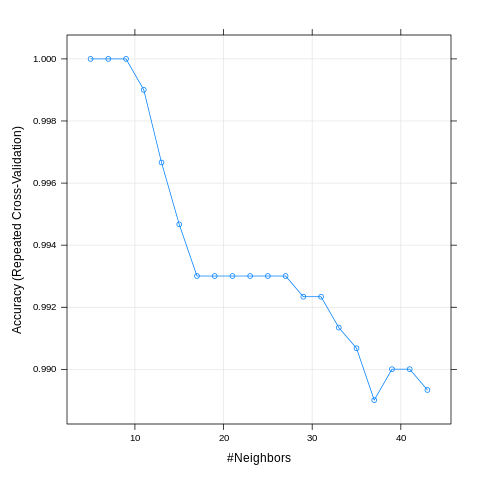

In [ ]:
%%R
#Calcular la "k"" óptima
#  Paso  1:  Definimos  control

ctrl  <-trainControl(method="repeatedcv",repeats  =  3)

#  Paso  2:  Calculamos  la  k  óptima

knnFit  <-train(as.factor(clase)  ~  .,  data  =  prueba,  method  =  "knn",    trControl  =  ctrl,  tuneLength  =  20)  

print(knnFit)

plot(knnFit)





In [ ]:
%%R

p  <-predict(knnFit,test)




confusionMatrix(as.factor(p),as.factor(test$clase))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 196   0
         1   0 176
                                     
               Accuracy : 1          
                 95% CI : (0.9901, 1)
    No Information Rate : 0.5269     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5269     
         Detection Rate : 0.5269     
   Detection Prevalence : 0.5269     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     
